<a href="https://colab.research.google.com/github/raxor555/YOLO-E-Object-detection-and-segmentation/blob/main/Object_Detection_Segmentation_YOLO_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q "git+https://github.com/THU-MIG/yoloe.git#subdirectory=third_party/CLIP"
!pip install -q "git+https://github.com/THU-MIG/yoloe.git#subdirectory=third_party/ml-mobileclip"
!pip install -q "git+https://github.com/THU-MIG/yoloe.git#subdirectory=third_party/lvis-api"
!pip install -q "git+https://github.com/THU-MIG/yoloe.git"

!pip install -q supervision jupyter_bbox_widget

!wget -q https://docs-assets.developer.apple.com/ml-research/datasets/mobileclip/mobileclip_blt.pt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from huggingface_hub import hf_hub_download

path = hf_hub_download(repo_id="jameslahm/yoloe", filename="yoloe-v8l-seg.pt", local_dir='.')
path = hf_hub_download(repo_id="jameslahm/yoloe", filename="yoloe-v8l-seg-pf.pt", local_dir='.')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


yoloe-v8l-seg.pt:   0%|          | 0.00/107M [00:00<?, ?B/s]

yoloe-v8l-seg-pf.pt:   0%|          | 0.00/103M [00:00<?, ?B/s]

In [7]:
!gdown "https://www.sustrans.org.uk/media/12334/three-people-walking-alongside-their-bikes-and-scooters-in-the-centre-of-edinburgh-dscf8372jpg-2021-brian-sweeney-all-rights-r-1.jpg?width=730&height=410&v=1daef1862048d50"
!gdown "https://lh4.googleusercontent.com/QdzUzA6jLWFapACl4Nu4bU_IXDkLTMwTodYJy7OZnr-36u-M247N8ilXt9NG_BrLpqn8I35VnnZfDNHz_GalxY-8N9cA4VJmZnwRN_makDVfNs-KPOapYdbze7z_U5WtR2kL6ufY_i9DHP6KobURFoKrqJGERCQdRc8duJetwVs3hkfH5JuxseSsritdNQ"

Downloading...
From: https://www.sustrans.org.uk/media/12334/three-people-walking-alongside-their-bikes-and-scooters-in-the-centre-of-edinburgh-dscf8372jpg-2021-brian-sweeney-all-rights-r-1.jpg?width=730&height=410&v=1daef1862048d50
To: /content/three-people-walking-alongside-their-bikes-and-scooters-in-the-centre-of-edinburgh-dscf8372jpg-2021-brian-sweeney-all-rights-r-1.jpg?width=730&height=410&v=1daef1862048d50
100% 444k/444k [00:00<00:00, 6.18MB/s]
Downloading...
From: https://lh4.googleusercontent.com/QdzUzA6jLWFapACl4Nu4bU_IXDkLTMwTodYJy7OZnr-36u-M247N8ilXt9NG_BrLpqn8I35VnnZfDNHz_GalxY-8N9cA4VJmZnwRN_makDVfNs-KPOapYdbze7z_U5WtR2kL6ufY_i9DHP6KobURFoKrqJGERCQdRc8duJetwVs3hkfH5JuxseSsritdNQ
To: /content/QdzUzA6jLWFapACl4Nu4bU_IXDkLTMwTodYJy7OZnr-36u-M247N8ilXt9NG_BrLpqn8I35VnnZfDNHz_GalxY-8N9cA4VJmZnwRN_makDVfNs-KPOapYdbze7z_U5WtR2kL6ufY_i9DHP6KobURFoKrqJGERCQdRc8duJetwVs3hkfH5JuxseSsritdNQ
100% 308k/308k [00:00<00:00, 54.1MB/s]


# Text prompt for image processing on image 1

Build text model mobileclip:blt


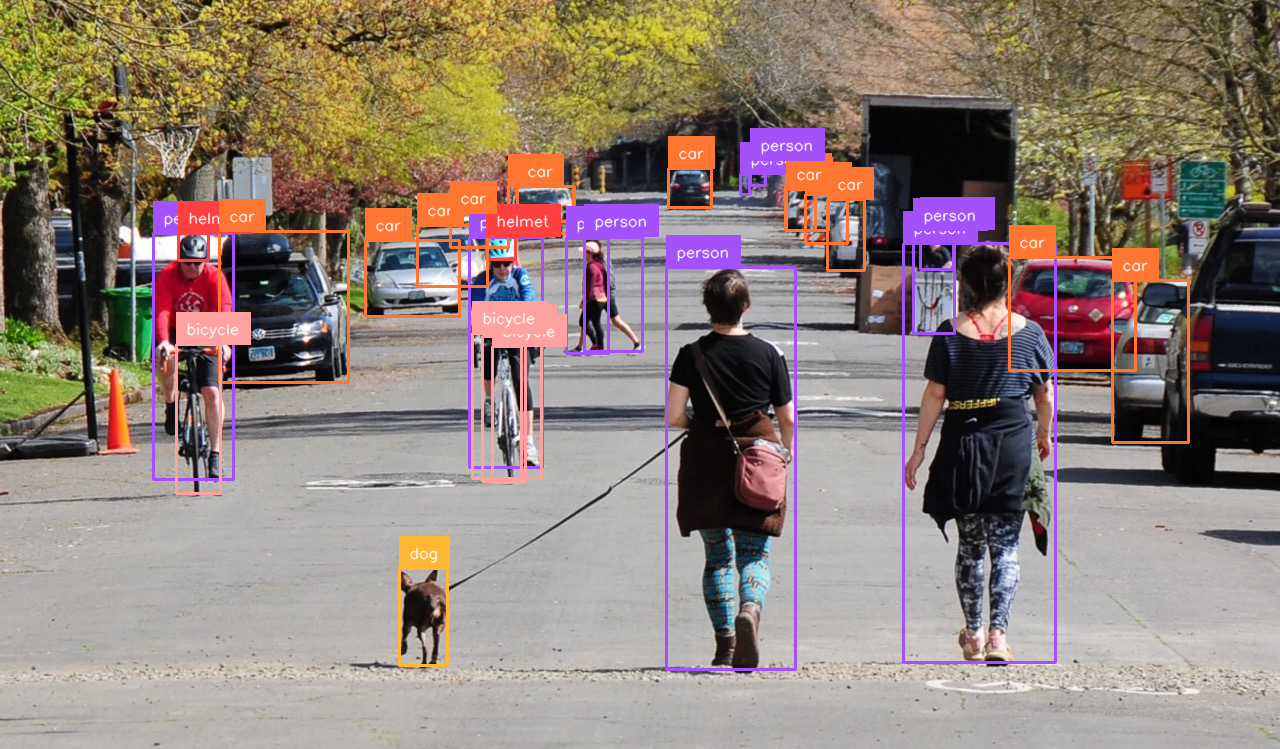

In [29]:
import supervision as sv
from ultralytics import YOLOE
from PIL import Image

IMAGE_PATH = "/content/QdzUzA6jLWFapACl4Nu4bU_IXDkLTMwTodYJy7OZnr-36u-M247N8ilXt9NG_BrLpqn8I35VnnZfDNHz_GalxY-8N9cA4VJmZnwRN_makDVfNs-KPOapYdbze7z_U5WtR2kL6ufY_i9DHP6KobURFoKrqJGERCQdRc8duJetwVs3hkfH5JuxseSsritdNQ"
NAMES = ["person", "helmet", "bicycle", "car", "dog"]

model = YOLOE("yoloe-v8l-seg.pt").cuda()
model.set_classes(NAMES, model.get_text_pe(NAMES))

image = Image.open(IMAGE_PATH)
results = model.predict(image, conf=0.1, verbose=False)

detections = sv.Detections.from_ultralytics(results[0])

annotated_image = image.copy()

annotated_image = sv.BoxAnnotator().annotate(scene=annotated_image, detections=detections)
annotated_image = sv.LabelAnnotator().annotate(scene=annotated_image, detections=detections)

annotated_image

#Text prompt for image processing on image 2


Build text model mobileclip:blt


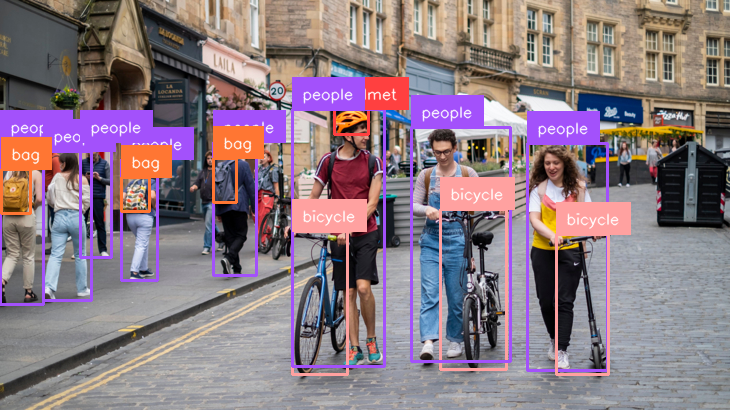

In [30]:
import supervision as sv
from ultralytics import YOLOE
from PIL import Image

IMAGE_PATH = "/content/three-people-walking-alongside-their-bikes-and-scooters-in-the-centre-of-edinburgh-dscf8372jpg-2021-brian-sweeney-all-rights-r-1.jpg?width=730&height=410&v=1daef1862048d50"
NAMES = ["people", "helmet", "bicycle", "bag",]

model = YOLOE("yoloe-v8l-seg.pt").cuda()
model.set_classes(NAMES, model.get_text_pe(NAMES))

image = Image.open(IMAGE_PATH)
results = model.predict(image, conf=0.1, verbose=False)

detections = sv.Detections.from_ultralytics(results[0])

annotated_image = image.copy()

annotated_image = sv.BoxAnnotator().annotate(scene=annotated_image, detections=detections)
annotated_image = sv.LabelAnnotator().annotate(scene=annotated_image, detections=detections)

annotated_image

#Visual prompt for image processing


In [16]:
import base64

def encode_image(filepath):
    with open(filepath, 'rb') as f:
        image_bytes = f.read()
    encoded = str(base64.b64encode(image_bytes), 'utf-8')
    return "data:/content/QdzUzA6jLWFapACl4Nu4bU_IXDkLTMwTodYJy7OZnr-36u-M247N8ilXt9NG_BrLpqn8I35VnnZfDNHz_GalxY-8N9cA4VJmZnwRN_makDVfNs-KPOapYdbze7z_U5WtR2kL6ufY_i9DHP6KobURFoKrqJGERCQdRc8duJetwVs3hkfH5JuxseSsritdNQ;base64,"+encoded

In [25]:
IS_COLAB = True
SOURCE_IMAGE_PATH = "/content/three-people-walking-alongside-their-bikes-and-scooters-in-the-centre-of-edinburgh-dscf8372jpg-2021-brian-sweeney-all-rights-r-1.jpg?width=730&height=410&v=1daef1862048d50"
TARGET_IMAGE_PATH = "/content/QdzUzA6jLWFapACl4Nu4bU_IXDkLTMwTodYJy7OZnr-36u-M247N8ilXt9NG_BrLpqn8I35VnnZfDNHz_GalxY-8N9cA4VJmZnwRN_makDVfNs-KPOapYdbze7z_U5WtR2kL6ufY_i9DHP6KobURFoKrqJGERCQdRc8duJetwVs3hkfH5JuxseSsritdNQ"
NAMES = ['bicycle', 'person']

if IS_COLAB:
    from google.colab import output
    output.enable_custom_widget_manager()

from jupyter_bbox_widget import BBoxWidget

widget = BBoxWidget(classes=NAMES)
widget.image = encode_image(SOURCE_IMAGE_PATH)
widget

BBoxWidget(classes=['bicycle', 'person'], colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c5…

In [26]:
widget.bboxes

[{'x': 279, 'y': 221, 'width': 80, 'height': 158, 'label': 'bicycle'},
 {'x': 434, 'y': 201, 'width': 81, 'height': 175, 'label': 'bicycle'},
 {'x': 545, 'y': 232, 'width': 86, 'height': 150, 'label': 'bicycle'},
 {'x': 302, 'y': 103, 'width': 95, 'height': 280, 'label': 'person'},
 {'x': 409, 'y': 114, 'width': 104, 'height': 274, 'label': 'person'},
 {'x': 523, 'y': 139, 'width': 80, 'height': 247, 'label': 'person'},
 {'x': 120, 'y': 152, 'width': 43, 'height': 135, 'label': 'person'},
 {'x': 193, 'y': 145, 'width': 29, 'height': 117, 'label': 'person'},
 {'x': 45, 'y': 149, 'width': 49, 'height': 160, 'label': 'person'},
 {'x': 2, 'y': 146, 'width': 42, 'height': 158, 'label': 'person'},
 {'x': 250, 'y': 149, 'width': 28, 'height': 120, 'label': 'person'},
 {'x': 220, 'y': 142, 'width': 32, 'height': 142, 'label': 'person'},
 {'x': 614, 'y': 138, 'width': 23, 'height': 55, 'label': 'person'}]

In [27]:
import numpy as np

default_box = [{'x': 279, 'y': 221, 'width': 80, 'height': 158, 'label': 'bicycle'},
 {'x': 434, 'y': 201, 'width': 81, 'height': 175, 'label': 'bicycle'},
 {'x': 545, 'y': 232, 'width': 86, 'height': 150, 'label': 'bicycle'},
 {'x': 302, 'y': 103, 'width': 95, 'height': 280, 'label': 'person'},
 {'x': 409, 'y': 114, 'width': 104, 'height': 274, 'label': 'person'},
 {'x': 523, 'y': 139, 'width': 80, 'height': 247, 'label': 'person'},
 {'x': 120, 'y': 152, 'width': 43, 'height': 135, 'label': 'person'},
 {'x': 193, 'y': 145, 'width': 29, 'height': 117, 'label': 'person'},
 {'x': 45, 'y': 149, 'width': 49, 'height': 160, 'label': 'person'},
 {'x': 2, 'y': 146, 'width': 42, 'height': 158, 'label': 'person'},
 {'x': 250, 'y': 149, 'width': 28, 'height': 120, 'label': 'person'},
 {'x': 220, 'y': 142, 'width': 32, 'height': 142, 'label': 'person'},
 {'x': 614, 'y': 138, 'width': 23, 'height': 55, 'label': 'person'}]



boxes = widget.bboxes if widget.bboxes else default_box
bboxes = np.array([
    [
        box['x'],
        box['y'],
        box['x'] + box['width'],
        box['y'] + box['height']
    ] for box in boxes
], dtype=np.float64)

cls = np.array([NAMES.index(box['label']) for box in boxes], dtype=np.int32)


0: 640x640 3 object0s, 10 object1s, 156.6ms
Speed: 5.5ms preprocess, 156.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 bicycles, 5 persons, 49.1ms
Speed: 3.0ms preprocess, 49.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


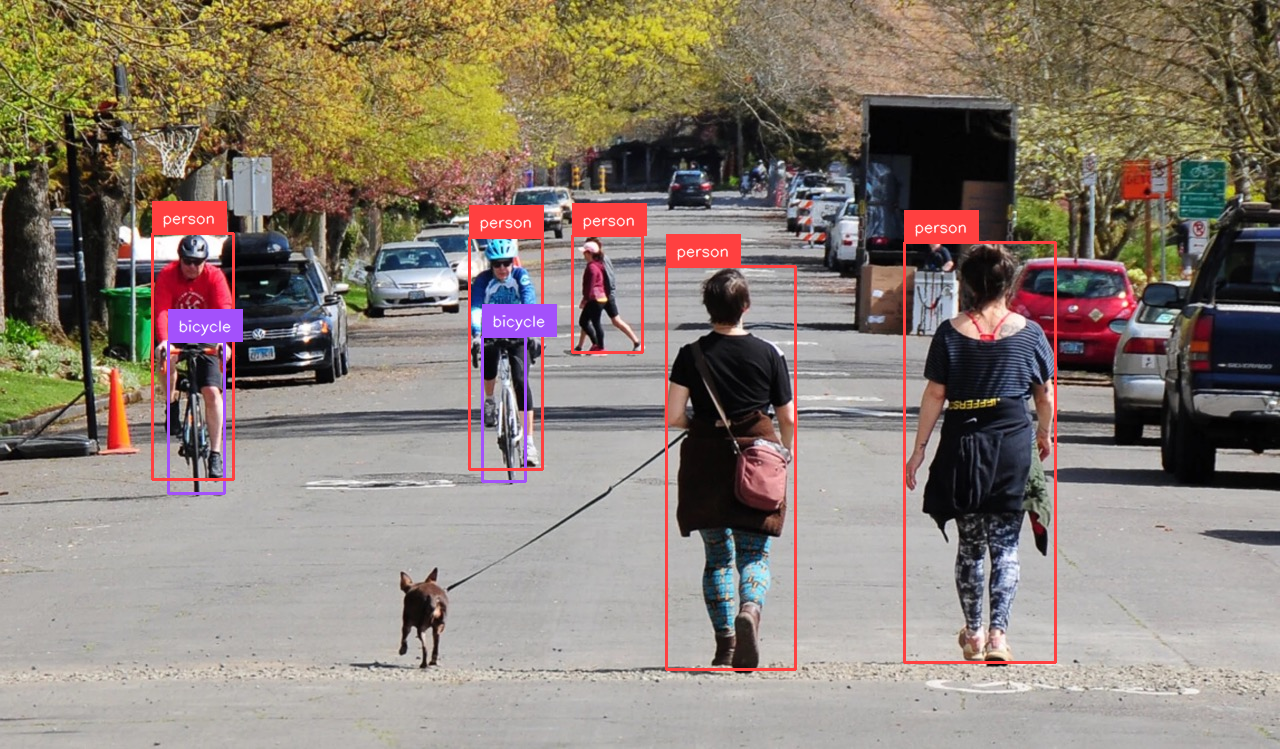

In [28]:
from ultralytics import YOLOE
from ultralytics.models.yolo.yoloe.predict_vp import YOLOEVPSegPredictor

model = YOLOE("yoloe-v8l-seg.pt").cuda()
prompts = dict(bboxes=bboxes, cls=cls)

source_image = Image.open(SOURCE_IMAGE_PATH)
target_image = Image.open(TARGET_IMAGE_PATH)

model.predict(source_image, prompts=prompts, predictor=YOLOEVPSegPredictor, return_vpe=True)
model.set_classes(NAMES, model.predictor.vpe)
model.predictor = None

results = model.predict(target_image)
#results[0].show()

detections = sv.Detections.from_ultralytics(results[0])

annotated_image = target_image.copy()
annotated_image = sv.BoxAnnotator().annotate(scene=annotated_image, detections=detections)
annotated_image = sv.LabelAnnotator().annotate(scene=annotated_image, detections=detections)

annotated_image